In [3]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sb

## read data

In [4]:
# Define paths
path_s2 =r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/1. Log experiment -S2 4x4 1000 input files/"
path_s3_one_sided = r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/2. Log experiment -S3 One sided (two sided False) 4x4 1000 input files/"
path_s3_two_sided = r'C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/3. Log experiment -S3 Two sided JW 4x4 1000 input files/'
path_s1 = r'C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/4. Log experiment -S1 4x4 30 input files/'

In [5]:
def logs_to_df(path):
    os.chdir(path)

    result_df = pd.DataFrame(columns=['heuristic', 'start_time', 'unit_literals', 'number_of_nodes','number_of_backtracks', 'time_lapsed', 'n_givens'])
    index_counter = 0
    for file in os.listdir(): # iterates through all sudoku log file names
        # Create the filepath of particular file
        file_path =f"{path}/{file}"
        with open(file_path) as f:
            data = f.read()

        js = json.loads(data)


        for key in list(js):
            if key not in ['heuristic', 'start_time','number_of_nodes','number_of_backtracks','time_lapsed','unit_literals','puzzle_clauses']:
                js.pop(key)

        js.update({'n_givens' : len(js['puzzle_clauses'])})
        js.pop('puzzle_clauses')

        result_df = pd.concat([result_df, pd.DataFrame(js, index=[index_counter])])
        index_counter+=1
    return result_df

In [6]:
logs_to_df(path_s2)

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,2,1.668779e+09,150,9,3,0.032679,4
1,2,1.668779e+09,95,5,1,0.022221,6
2,2,1.668779e+09,136,12,5,0.027090,4
3,2,1.668779e+09,90,6,1,0.020044,4
4,2,1.668779e+09,92,7,2,0.021703,4
...,...,...,...,...,...,...,...
995,2,1.668779e+09,93,5,1,0.021951,6
996,2,1.668779e+09,210,10,4,0.033119,6
997,2,1.668779e+09,133,8,3,0.022402,6
998,2,1.668779e+09,71,5,1,0.019133,4


### 4x4 heuristic 2:

In [7]:
result_df_h2 = logs_to_df(path_s2)
result_df_h2['heuristic'] = 'h2'
result_df_h2.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,h2,1.668779e+09,150,9,3,0.032679,4
1,h2,1.668779e+09,95,5,1,0.022221,6
2,h2,1.668779e+09,136,12,5,0.027090,4
3,h2,1.668779e+09,90,6,1,0.020044,4
4,h2,1.668779e+09,92,7,2,0.021703,4


### 4x4 heuristic 3 one-sided:

In [8]:
result_df_h3_one_sided = logs_to_df(path_s3_one_sided)
result_df_h3_one_sided['heuristic'] = 'jw_one_sided'
result_df_h3_one_sided.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,jw_one_sided,1.668780e+09,89,6,0,0.022560,4
1,jw_one_sided,1.668780e+09,89,6,0,0.022524,4
2,jw_one_sided,1.668780e+09,87,6,0,0.021794,4
3,jw_one_sided,1.668780e+09,91,6,0,0.024631,4
4,jw_one_sided,1.668780e+09,101,5,0,0.020745,6


### 4x4 heuristic 3 two-sided

In [9]:
result_df_h3_two_sided = logs_to_df(path_s3_two_sided)
result_df_h3_two_sided['heuristic'] = 'jw_two_sided'
result_df_h3_two_sided.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,jw_two_sided,1.668779e+09,101,9,2,0.021025,4
1,jw_two_sided,1.668779e+09,91,6,0,0.022342,4
2,jw_two_sided,1.668779e+09,87,6,0,0.020721,4
3,jw_two_sided,1.668779e+09,100,4,0,0.020293,6
4,jw_two_sided,1.668779e+09,107,5,0,0.022023,6


### 4x4 heuristic 1

In [10]:
result_df_h1 = logs_to_df(path_s1)
result_df_h1['heuristic'] = 'h1'
result_df_h1.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,h1,1.668788e+09,0,181433,90708,180.698524,4
1,h1,1.668789e+09,0,14397,7190,15.206277,6
2,h1,1.668781e+09,0,24915,12449,29.960734,6
3,h1,1.668780e+09,0,18045,9014,22.827781,6
4,h1,1.668787e+09,0,1357,670,1.706477,6


### concat all dataframes:

In [11]:
sudoku4x4_results =  pd.concat([result_df_h2,result_df_h3_one_sided,result_df_h3_two_sided,result_df_h1])

#### main statistics:

In [12]:
sudoku4x4_results.nunique()

heuristic                  4
start_time              3030
unit_literals            118
number_of_nodes           45
number_of_backtracks      39
time_lapsed             2711
n_givens                   2
dtype: int64

In [13]:
time_stats = sudoku4x4_results[["heuristic", "time_lapsed"]].groupby("heuristic").agg({'time_lapsed': ['mean','std' ,'min', 'max']})
time_stats

time_lapsed                                 
                    mean        std       min         max
heuristic                                                
h1            110.649474  96.479384  1.706477  333.087855
h2              0.024207   0.005052  0.017636    0.062079
jw_one_sided    0.021900   0.002521  0.017117    0.042463
jw_two_sided    0.022035   0.002552  0.018057    0.043859

In [14]:
backtrack_stats = sudoku4x4_results[["heuristic",'number_of_backtracks']].groupby("heuristic").agg({'number_of_backtracks': ['mean','std' ,'min', 'max']})
backtrack_stats

number_of_backtracks                           
                             mean           std  min     max
heuristic                                                   
h1                      52441.400  45049.008598  670  147135
h2                          2.475      1.590567    0       8
jw_one_sided                0.353      0.794369    0       3
jw_two_sided                0.353      0.794369    0       3

In [15]:
number_of_nodes_stats = sudoku4x4_results[["heuristic",'number_of_nodes']].groupby("heuristic").agg({'number_of_nodes': ['mean','std' ,'min', 'max']})
number_of_nodes_stats

number_of_nodes                            
                        mean           std   min     max
heuristic                                               
h1                104899.800  90098.017197  1357  294287
h2                     8.038      2.818954     4      18
jw_one_sided           5.471      1.627208     4      10
jw_two_sided           5.471      1.627208     4      10

### plotting:

<AxesSubplot: xlabel='heuristic'>

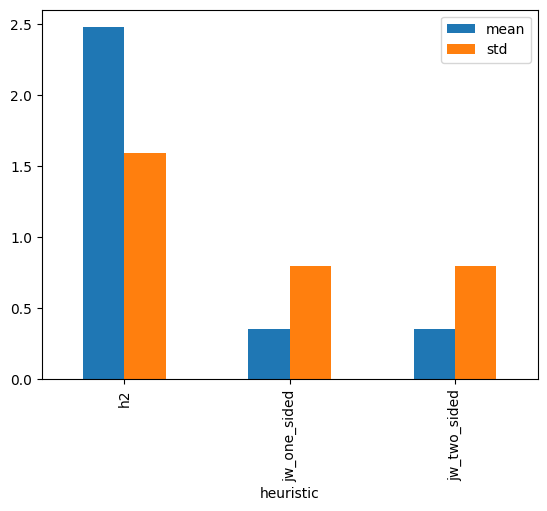

In [16]:
sudoku4x4_results[sudoku4x4_results['heuristic'] != 'h1'].groupby(['heuristic'])['number_of_backtracks'].agg(['mean','std']).plot.bar()


<AxesSubplot: xlabel='heuristic'>

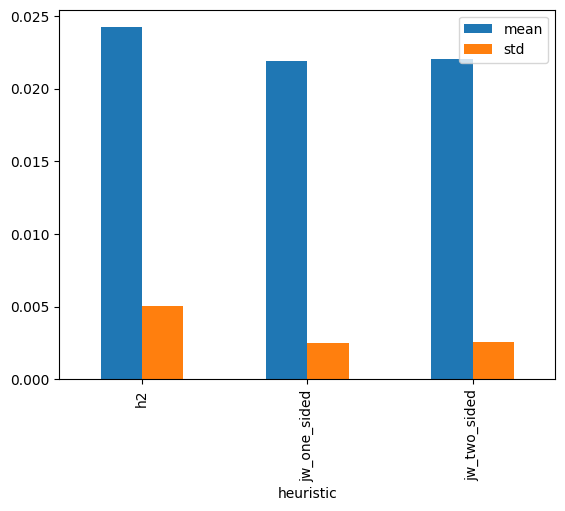

In [17]:
sudoku4x4_results[sudoku4x4_results['heuristic'] != 'h1'].groupby(['heuristic'])['time_lapsed'].agg(['mean','std']).plot.bar()


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

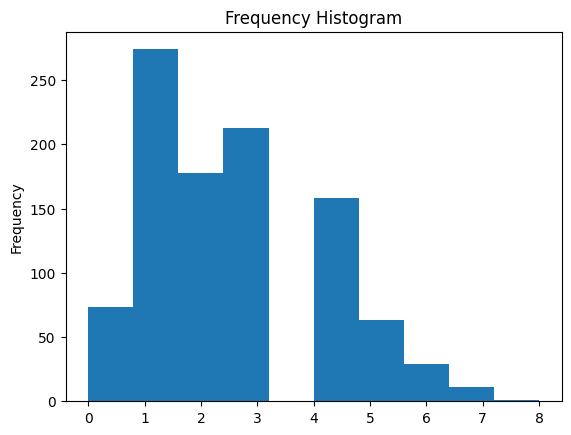

In [18]:
# Plot Histogram on x
plt.hist(result_df_h2['number_of_backtracks'], bins=10)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

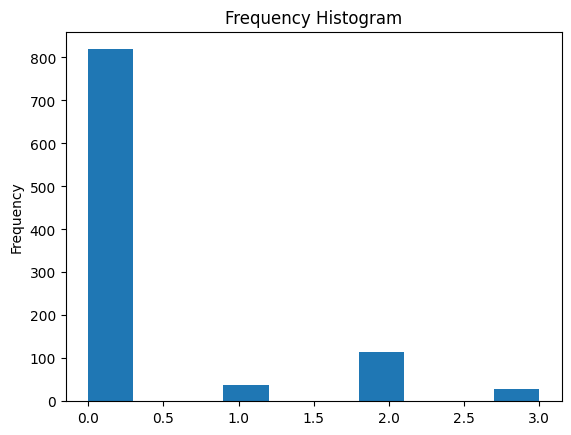

In [19]:
plt.hist(result_df_h3_two_sided['number_of_backtracks'], bins=10)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

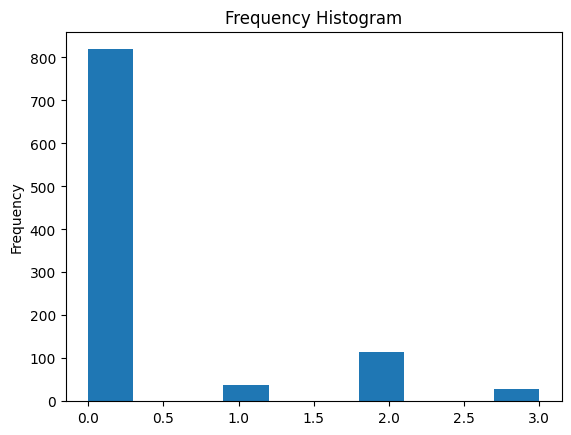

In [20]:
plt.hist(result_df_h3_one_sided['number_of_backtracks'], bins=10)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

## distribution of occurences
note: leaving this part for now

In [21]:
# Define paths
path_s2 =r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/1. Log experiment -S2 4x4 1000 input files/"
path_s3_one_sided = r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/2. Log experiment -S3 One sided (two sided False) 4x4 1000 input files/"
path_s3_two_sided = r'C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/3. Log experiment -S3 Two sided JW 4x4 1000 input files/'
path_s1 = r'C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/4. Log experiment -S1 4x4 30 input files/'

In [22]:
path_s2 =r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/4x4/1. Log experiment -S2 4x4 1000 input files/"
os.chdir(path_s2)
#I call first file just to create list_of_variables, and count_occurances dict
with open(os.listdir()[0]) as f:
        data = json.load(f)

list_of_variables = list(data['initial_state']['variables'])

count_occurances = dict(zip(list_of_variables, [0 for i in range(len(list_of_variables))]))
# counting starts here
for file in os.listdir():
    with open(file) as f:
        data = json.load(f)



    list_of_clauses = data['initial_state']['set_of_clauses']

    

    for var in list_of_variables:
        for clause in list_of_clauses:
            if var in clause or ('-'+var) in clause:
                count_occurances.update({var: count_occurances[var] + 1})


In [23]:
count_occurances

{'111': 16079,
 '112': 16078,
 '113': 16069,
 '114': 16078,
 '121': 16092,
 '122': 16086,
 '123': 16071,
 '124': 16074,
 '131': 16074,
 '132': 16071,
 '133': 16081,
 '134': 16079,
 '141': 16072,
 '142': 16074,
 '143': 16080,
 '144': 16088,
 '211': 16073,
 '212': 16073,
 '213': 16086,
 '214': 16073,
 '221': 16073,
 '222': 16080,
 '223': 16073,
 '224': 16071,
 '231': 16088,
 '232': 16075,
 '233': 16076,
 '234': 16059,
 '241': 16077,
 '242': 16086,
 '243': 16080,
 '244': 16078,
 '311': 16076,
 '312': 16088,
 '313': 16066,
 '314': 16091,
 '321': 16076,
 '322': 16071,
 '323': 16081,
 '324': 16070,
 '331': 16077,
 '332': 16075,
 '333': 16079,
 '334': 16066,
 '341': 16075,
 '342': 16070,
 '343': 16082,
 '344': 16078,
 '411': 16074,
 '412': 16084,
 '413': 16076,
 '414': 16080,
 '421': 16078,
 '422': 16066,
 '423': 16079,
 '424': 16082,
 '431': 16081,
 '432': 16080,
 '433': 16075,
 '434': 16087,
 '441': 16080,
 '442': 16071,
 '443': 16070,
 '444': 16083}